In [1]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

In [3]:
def residual_analysis(a):
    #Histogram
    _ = plt.hist(a.resid_pearson, bins = 'auto')
    plt.title('Histogram')
    plt.show()
    
    #Histogram
    fig = sm.qqplot(a.resid_pearson, stats.norm, fit=True, line='45')
    plt.title('Q-Q Plot')
    plt.show()
    
    #Heteroscedasticity and Homoscedasticity
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Residual
    y = data[:, 8]
    _ = plt.plot(x, y, 'o', color = 'b')
    plt.title('Heteroscedasticity and Homoscedasticity')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.show()
    
    #Outliers
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Studentized Residual
    y = data[:, 10]
    plt.plot(x, y, 'o', color = 'gray')
    plt.title('Outliers')
    plt.axhline(y=2, color = 'red', lw = 0.8)
    plt.axhline(y=-2, color = 'red', lw = 0.8)
    plt.show()
    
    #Influential Observations
    x = data[:, 2]
    cook_dist = data[:, 11]
    plt.plot(x, cook_dist, 'o', color = 'gray')
    plt.title("Cook's Distance")
    plt.show()

## DSAP 108

### 影片長度與觀看倍數

In [4]:
df1 = pd.read_excel('dsap108_videoLenVs_0614.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
0,29509,2431,0.000000,0.000000,0.000000
1,25668,4010,26.128440,0.776302,1.549803
2,25657,1081,5.311927,0.811804,1.451234
3,29511,4302,0.000000,0.000000,0.000000
4,26022,2508,7.504587,0.583465,1.564830


Tail of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
105,5594,800,6.192661,0.993085,1.431365
106,5595,374,1.633028,0.770888,1.414099
107,5596,526,2.155963,0.823839,1.451685
108,5597,343,0.798165,0.583839,1.404398
109,5964,1012,0.000000,0.000000,0.000000


In [5]:
df1 = df1.replace(0, np.nan)
df1 = df1.dropna()
df1.describe()

,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,12094.357143,881.916667,2.491918,0.639039,1.490064
std,9648.119296,643.904416,3.317758,0.331587,0.198631
min,4581.000000,114.000000,0.036697,0.000187,0.181818
25%,4611.500000,510.750000,0.660550,0.469559,1.452599
50%,5451.500000,716.500000,1.633028,0.728212,1.506623
75%,23569.250000,911.000000,3.366972,0.890451,1.548029
max,28142.000000,4010.000000,26.128440,1.159671,1.880576


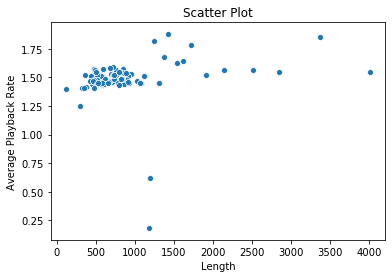

In [6]:
sns.scatterplot(x = df1['len'], y = df1['avg_playback_rate'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Playback Rate')
plt.show()

In [7]:
# Fit regression model 
df1_result = smf.ols('avg_playback_rate ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_playback_rate   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.662
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.107
Time:                        12:52:36   Log-Likelihood:                 18.424
No. Observations:                  84   AIC:                            -32.85
Df Residuals:                      82   BIC:                            -27.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4418      0.037     39.466      0.0

### Residual Analysis

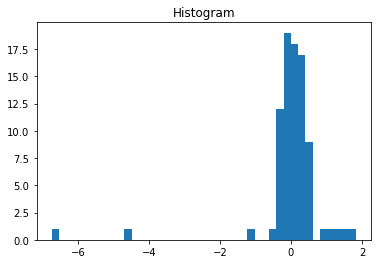

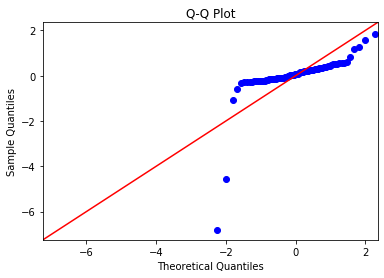

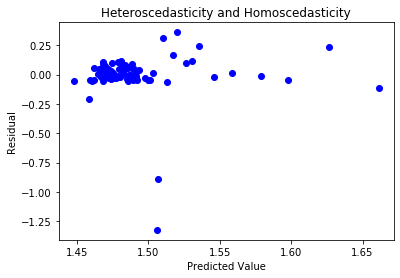

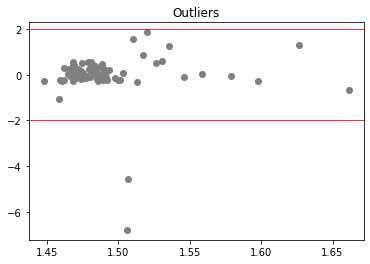

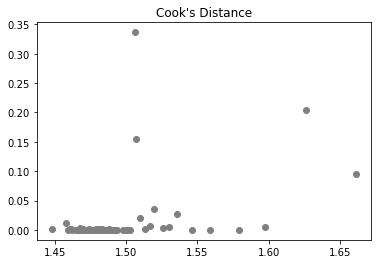

In [8]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [9]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.502, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is no sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are two outliers <br>
There is no observation with Cook’s distance > 1. Therefore, there is no significant influential observation

### 影片長度與影片完成度

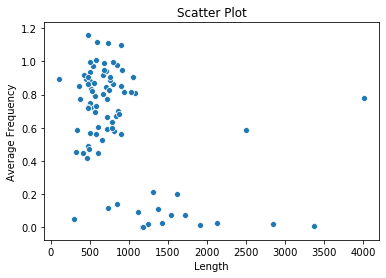

In [10]:
sns.scatterplot(x = df1['len'], y = df1['avg_freq'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Frequency')
plt.show()

In [11]:
# Fit regression model 
df1_result = smf.ols('avg_freq ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_freq   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     21.47
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.34e-05
Time:                        12:52:59   Log-Likelihood:                -16.197
No. Observations:                  84   AIC:                             36.39
Df Residuals:                      82   BIC:                             41.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8459      0.055     15.333      0.0

### Residual Analysis

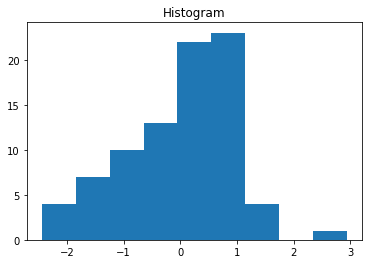

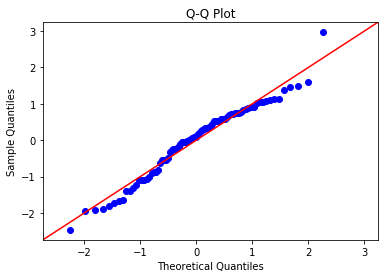

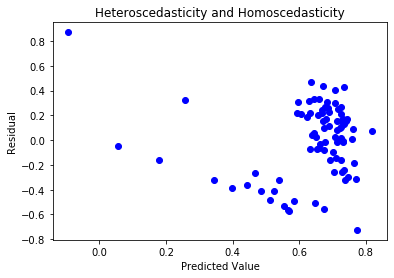

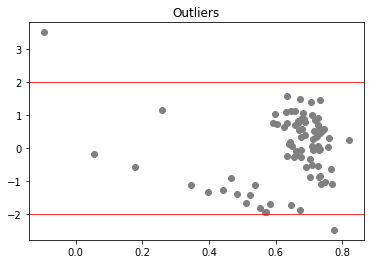

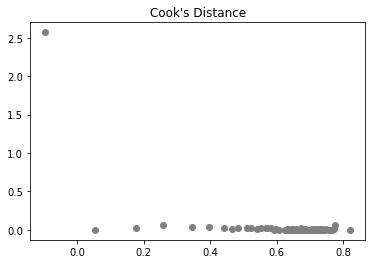

In [12]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [13]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.971, p=0.059


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.059 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are two outliers <br>
There is one observation with Cook’s distance > 1. Therefore, there is one significant influential observation

### 影片長度與暫停次數

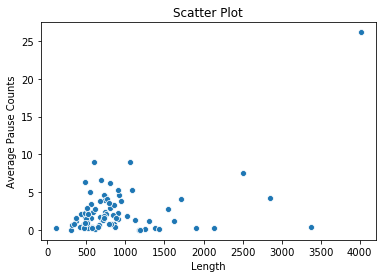

In [14]:
sns.scatterplot(x = df1['len'], y = df1['avg_pause_cnt'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Pause Counts')
plt.show()

In [15]:
# Fit regression model 
df1_result = smf.ols('avg_pause_cnt ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_pause_cnt   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     23.78
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           5.21e-06
Time:                        12:53:34   Log-Likelihood:                -208.73
No. Observations:                  84   AIC:                             421.5
Df Residuals:                      82   BIC:                             426.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3373      0.546      0.618      0.5

### Residual Analysis

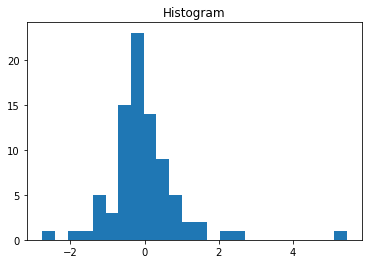

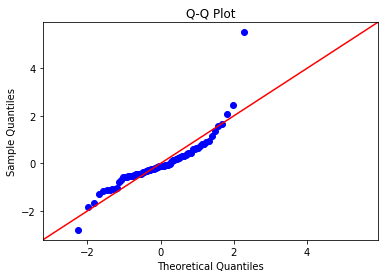

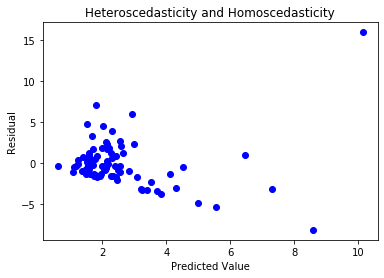

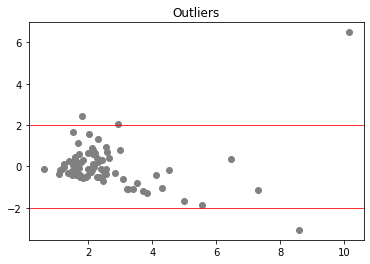

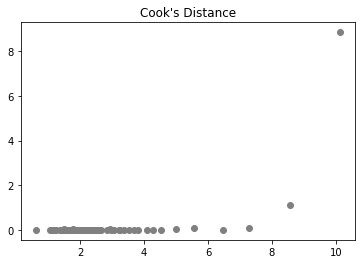

In [16]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [17]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.842, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are four outliers <br>
There are two observation with Cook’s distance > 1. Therefore, there are two significant influential observation